# Import Dependencies 

In [1]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

## Load the Data

In [2]:
# read the saved data:
music_df = pd.read_csv("../output/all_data_genre.csv", encoding = "Latin-1")
print(len(music_df))
music_df.head()

817


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,463574485,Asian Music
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,410083687,Rap/Hip Hop
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,484372295,Pop
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,108447472,Pop
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,442984025,Latin Music


## Remove Duplicated Rows and Unwanted Columns

In [3]:
# Using Pandas remove duplicated Rows
# Make sure to drop duplicated rows based on the specified creteria 
# not just based on track_name because different songs could have the same name!
unduplicated_music_df = music_df.drop_duplicates(subset=["track_name", "artist(s)_name",
                                                         "released_year", "released_month", 
                                                         "Deezer Album ID"], keep=False,\
                                                         inplace=False)
len(unduplicated_music_df)

813

In [4]:
# Remove Unwanted Columns:
final_music_df = unduplicated_music_df.drop(columns=["in_shazam_charts", "released_day",
                                                      "bpm","key","mode", "danceability_%", 
                                                      "valence_%", "energy_%", "acousticness_%",
                                                      "instrumentalness_%", "liveness_%",
                                                      "speechiness_%", "Deezer Album ID",
                                                      "in_spotify_charts", "in_apple_charts",
                                                      "in_deezer_charts"])
# final_music_df.columns
final_music_df.count()

track_name              813
artist(s)_name          813
artist_count            813
released_year           813
released_month          813
in_spotify_playlists    813
streams                 813
in_apple_playlists      813
in_deezer_playlists     813
Deezer Genre            695
dtype: int64

## Rename Columns Then Remove Empty Cells

In [5]:
# First, using pandas Rename the columns
final_music_df = final_music_df.rename(columns={"track_name": "Track Name", "artist(s)_name": "Artist(s) Name",
                                                "artist_count": "Artist Count",
                                                "released_year": "Released Year", "released_month": "Released Month", 
                                                "in_spotify_playlists": "In Spotify Playlists",
                                                "streams": "Spotify Streams",
                                                "in_apple_playlists": "In Apple Playlists", 
                                                "in_deezer_playlists": "In Deezer Playlists",
                                                })

# Now remove all empty cells - NOTE: All empty cells are in the "Deezer Genre" column
cleaned_final_music_df = final_music_df.dropna()

print(len(cleaned_final_music_df))
cleaned_final_music_df.head(3)

695


,Track Name,Artist(s) Name,Artist Count,Released Year,Released Month,In Spotify Playlists,Spotify Streams,In Apple Playlists,In Deezer Playlists,Deezer Genre
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,141381703,43,45,Asian Music
1,LALA,Myke Towers,1,2023,3,1474,133716286,48,58,Rap/Hip Hop
2,vampire,Olivia Rodrigo,1,2023,6,1397,140003974,94,91,Pop


In [6]:
# The Track Name ""Love Grows (Where My Rosemary Goes)"" has an error in the 
# "Spotify Streams" Column so will remove it using drop by index.

# drop by index
cleaned_final_music_df = cleaned_final_music_df.drop([478])
len(cleaned_final_music_df)

694

In [7]:
print(cleaned_final_music_df[["Spotify Streams", "In Deezer Playlists"]].dtypes)

print("-------------------------------------------")

# Convert the values in the "Spotify Streams" AND "In Deezer Playlists" Columns to integer
# First convert the Spotify Streams Column
cleaned_final_music_df["Spotify Streams"] = cleaned_final_music_df["Spotify Streams"].astype("int64")

# For the "Deezer Playlist" column we have to remove the "," then convert the string to an interger.
cleaned_final_music_df["In Deezer Playlists"] = cleaned_final_music_df["In Deezer Playlists"].str.replace(",", "")
cleaned_final_music_df["In Deezer Playlists"] = cleaned_final_music_df["In Deezer Playlists"].astype(int) 

print(cleaned_final_music_df[["Spotify Streams", "In Deezer Playlists"]].dtypes)

Spotify Streams        object
In Deezer Playlists    object
dtype: object
-------------------------------------------
Spotify Streams        int64
In Deezer Playlists    int32
dtype: object


In [8]:
# export the final cleaned dataframe to a csv file:
cleaned_final_music_df.to_csv("../output/cleaned_song_data.csv", encoding = "Latin-1", index=False, header=True)

# Filter to Solo Singers

In [9]:
# First filter the dataframe to music done by solo singers.
# Then sort the music in DESCENDING order 
# so we see the newest songs first!
solo_artists_df = cleaned_final_music_df[cleaned_final_music_df["Artist Count"] == 1]\
                   .sort_values(by=["Released Year", "Released Month", "Spotify Streams"], ascending = False)

# To format and make numbers readable,
# First make a copy so we don't mess the orginial one:
solo_artists_modified = solo_artists_df.copy()
solo_artists_modified["Spotify Streams"] = solo_artists_modified["Spotify Streams"].map("{:,}".format)
solo_artists_modified.head(3)

,Track Name,Artist(s) Name,Artist Count,Released Year,Released Month,In Spotify Playlists,Spotify Streams,In Apple Playlists,In Deezer Playlists,Deezer Genre
11,Super Shy,NewJeans,1,2023,7,422,"58,255,150",37,21,Asian Music
7,Columbia,Quevedo,1,2023,7,714,"58,149,378",25,30,Reggaeton
58,Enchanted (Taylor's Version),Taylor Swift,1,2023,7,148,"39,578,178",32,8,Country


<h1><center>2023 Top Songs in Each Platform</center></h1>

In [10]:
# Define a function that will highlight the background of a specified column.
def highlighting(inp_var, color='RGB(205,193,197)'):
    return [f'background-color: {color}' for i in inp_var]

In [11]:
# --------------------------------------------------------------------------------------------------------
# Sort all values for the columns of interest in DESCENDING order
# SPOTIFY ------------------------------------------------------------------------------------------------
top_streams_df = solo_artists_df.sort_values(by="Spotify Streams", ascending=False) 
top_Spotify_playlists = solo_artists_df.sort_values(by="In Spotify Playlists", ascending=False) 

# APPLE ---------------------------------------------------------------------------------------------------
top_Apple_playlists = solo_artists_df.sort_values(by="In Apple Playlists", ascending=False)

# DEEZER --------------------------------------------------------------------------------------------------
top_Deezer_playlists = solo_artists_df.sort_values(by="In Deezer Playlists", ascending=False) 
# --------------------------------------------------------------------------------------------------------

### `Top Songs in Spotify Playlists`

In [12]:
# Format the Spotify Playlist Column for better readability.
top_Spotify_playlists["In Spotify Playlists"] = top_Spotify_playlists["In Spotify Playlists"].map("{:,}".format)

top_Spotify_playlists[["Track Name", "Artist(s) Name", "In Spotify Playlists", 
                       "Released Year", "Released Month", "Deezer Genre"]].head(3)\
                      .style.apply(highlighting, axis=0, subset=["In Spotify Playlists"])

,Track Name,Artist(s) Name,In Spotify Playlists,Released Year,Released Month,Deezer Genre
525,Mr. Brightside,The Killers,"51,979",2003,9,Rock
606,Wake Me Up - Radio Edit,Avicii,"50,887",2013,1,Electro
520,Smells Like Teen Spirit - Remastered 2021,Nirvana,"49,991",1991,9,Rock


### `Top Songs in Apple Playlists`

In [13]:
top_Apple_playlists[["Track Name", "Artist(s) Name", "In Apple Playlists", 
                       "Released Year", "Released Month", "Deezer Genre"]].head(3)\
                      .style.apply(highlighting, axis=0, subset=["In Apple Playlists"])

,Track Name,Artist(s) Name,In Apple Playlists,Released Year,Released Month,Deezer Genre
352,Don't Start Now,Dua Lipa,532,2019,10,Pop
576,Thinking Out Loud,Ed Sheeran,363,2014,1,Pop
149,Shake It Off,Taylor Swift,328,2014,1,Singer & Songwriter


### `Top Songs in Deezer Playlists`

In [14]:
# Format the Deezer Playlist Column for better readability.
top_Deezer_playlists["In Deezer Playlists"] = top_Deezer_playlists["In Deezer Playlists"].map("{:,}".format)

top_Deezer_playlists[["Track Name", "Artist(s) Name", "In Deezer Playlists", 
                       "Released Year", "Released Month", "Deezer Genre"]].head(3)\
                      .style.apply(highlighting, axis=0, subset=["In Deezer Playlists"])

,Track Name,Artist(s) Name,In Deezer Playlists,Released Year,Released Month,Deezer Genre
520,Smells Like Teen Spirit - Remastered 2021,Nirvana,"12,367",1991,9,Rock
777,The Scientist,Coldplay,"7,827",2002,8,Rock
288,Numb,Linkin Park,"7,341",2003,3,Dance


<h1><center>---------- TOP 3 SONGS Based on Spotify Streams ---------- </center></h1>

In [15]:
# Format the Deezer Playlist Column for better readability.
top_streams_df["Spotify Streams"] = top_streams_df["Spotify Streams"].map("{:,}".format)

top_streams_df[["Track Name", "Artist(s) Name", "Spotify Streams", 
                       "Released Year", "Released Month", "Deezer Genre"]].head(3)\
                      .style.apply(highlighting, axis=0, subset=["Spotify Streams", "Deezer Genre"])

,Track Name,Artist(s) Name,Spotify Streams,Released Year,Released Month,Deezer Genre
151,Shape of You,Ed Sheeran,"3,562,543,890",2017,1,Pop
122,Believer,Imagine Dragons,"2,594,040,133",2017,1,Alternative
120,Perfect,Ed Sheeran,"2,559,529,074",2017,1,Pop


# 2023 Top Artists

In [16]:
# NOTE: this is the work Count for each solo artist 
# who has more than 2 top songs in 2023.

artists_work_count = solo_artists_df["Artist(s) Name"].value_counts()

# Initialize empty lists
artist_names = []
work_count = []

for category, count in artists_work_count.items():
    if count >= 3:
        artist_names.append(category)
        work_count.append(count)
        
print(f"There are {len(artist_names)} artists names")

There are 33 artists names


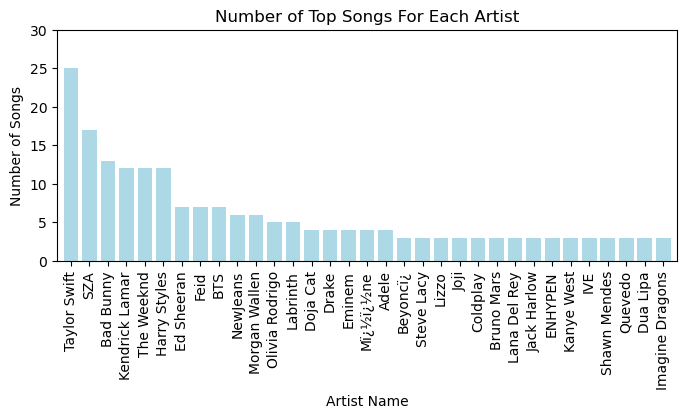

In [17]:
#                     ********************          PLOTTING          ********************   

# Resize the plot to make it fit in the screen
plt.figure(figsize=(8,3))

plt.bar(artist_names, work_count, color="lightblue", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in artist_names]         
plt.xticks(tick_locations, artist_names, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(artist_names)-0.25)
plt.ylim(0, max(work_count)+5)

# Give our chart some labels and a tile
plt.title("Number of Top Songs For Each Artist")
plt.xlabel("Artist Name")
plt.ylabel("Number of Songs")

# Save the chart.
# plt.savefig("../output/Num_Top_Songs_For_Each_Artist.png")

# Display
plt.show()

### Most popular songs were released in which month?


In [18]:
# Count the months a song was released in.
released_month_count = solo_artists_df["Released Month"].value_counts()
# -----------------------------
# Initialize empty lists
month_names = []
month_count = []

for category, count in released_month_count.items():
    month_names.append(category)
    month_count.append(count)
    
# -----------------------------    
# create a dictionary so we order the keys
dic = {}
for key in month_names:
    for value in month_count:
        dic[key] = value
        month_count.remove(value)
        break
        
# -------------------------------
# Sort the keys of the dictionary which are the months
myKeys = list(dic.keys())
myKeys.sort()
sorted_dict = {i: dic[i] for i in myKeys}
 
print(sorted_dict)   

# -------------------------------
# Now Rename the keys - The months.
month_list = ["Jan.", "Feb.", "Mar.", "April", "May", "June",\
              "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]
x = 0
while x < len(month_list):
     sorted_dict[month_list[x]]= sorted_dict.pop(x+1)
     x = x + 1

print(sorted_dict)  

# -------------------------------
# Now I want to convert the dictionary into 2 lists for plotting.
month_names = list(sorted_dict.keys())
month_count = list(sorted_dict.values())

print(month_names)
print(month_count)

{1: 75, 2: 26, 3: 33, 4: 35, 5: 61, 6: 33, 7: 31, 8: 20, 9: 25, 10: 43, 11: 30, 12: 39}
{'Jan.': 75, 'Feb.': 26, 'Mar.': 33, 'April': 35, 'May': 61, 'June': 33, 'July': 31, 'Aug.': 20, 'Sept.': 25, 'Oct.': 43, 'Nov.': 30, 'Dec.': 39}
['Jan.', 'Feb.', 'Mar.', 'April', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']
[75, 26, 33, 35, 61, 33, 31, 20, 25, 43, 30, 39]


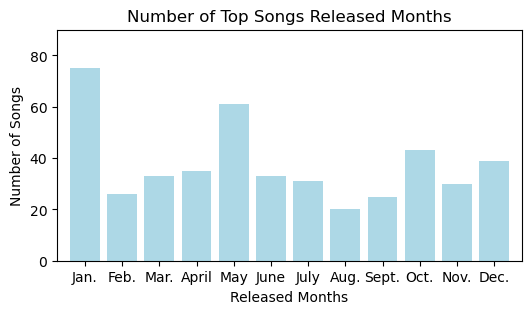

In [19]:
#                     ********************          PLOTTING          ********************   

# Resize the plot to make it fit in the screen
plt.figure(figsize=(6,3))

# Create a bar chart
plt.bar(month_names, month_count, color = "lightblue", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in month_names]         
plt.xticks(tick_locations, month_names)

# Set x and y limits
plt.xlim(-0.75, len(month_names)-0.25)
plt.ylim(0, max(month_count)+15)

# Give our chart some labels and a title
plt.title("Number of Top Songs Released Months")
plt.xlabel("Released Months")
plt.ylabel("Number of Songs")

# Save the chart
# plt.savefig("../output/Top_Songs_Released_Months")

# Display
plt.show()